In [16]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
%autoreload
import sys

sys.path.insert(0, '../')
from constants import *
from lin_reg import *

[autoreload of Lin_reg failed: Traceback (most recent call last):
  File "/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/simenfritzner/opt/anaconda3/lib/python3.9/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/simenfritzner/opt/anaconda3/lib/python3.9/importlib/__init__.py", line 168, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module 'Lin_reg'
]


# Defining the features we want to keep for the model

In [18]:
#Cleaning data such that only wanted features are included
selected_features = ["date_forecast", 'direct_rad:W', 'direct_rad_1h:J', 'clear_sky_rad:W',
                     'clear_sky_energy_1h:J', 'diffuse_rad:W', 'sun_elevation:d', 'is_in_shadow:idx', 'is_day:idx']

# Fitting a linear regression model and predicting on test data from X_estimated

In [19]:
Lin_reg_a = Lin_reg(X_observed_a, X_estimated_a, y_a, selected_features)
Lin_reg_a.fit()
Lin_reg_a.pred()

Lin_reg_b = Lin_reg(X_observed_b, X_estimated_b, y_b, selected_features)
Lin_reg_b.fit()
Lin_reg_b.pred()

Lin_reg_c = Lin_reg(X_observed_c, X_estimated_c, y_c, selected_features)
Lin_reg_c.fit()
Lin_reg_c.pred()

/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623

# Evaluating Mean Absolute Error on the test data from X_estimated

In [20]:
#Evaluate mean asbolute error
mae_a = Lin_reg_a.mae()
print("A: Mean Absolute Error:", mae_a)

mae_b =Lin_reg_b.mae()
print("B: Mean Absolute Error:", mae_b)

mae_c = Lin_reg_c.mae()
print("C: Mean Absolute Error:", mae_c)

#Saving y_pred in a proper csv file
#filename = "CSV/second_submission.csv"
#submission(filename, y_pred)

A: Mean Absolute Error: 197.85315240677173
B: Mean Absolute Error: 34.817976284647536
C: Mean Absolute Error: 26.59026308829535


Pearson correlation: 0.91


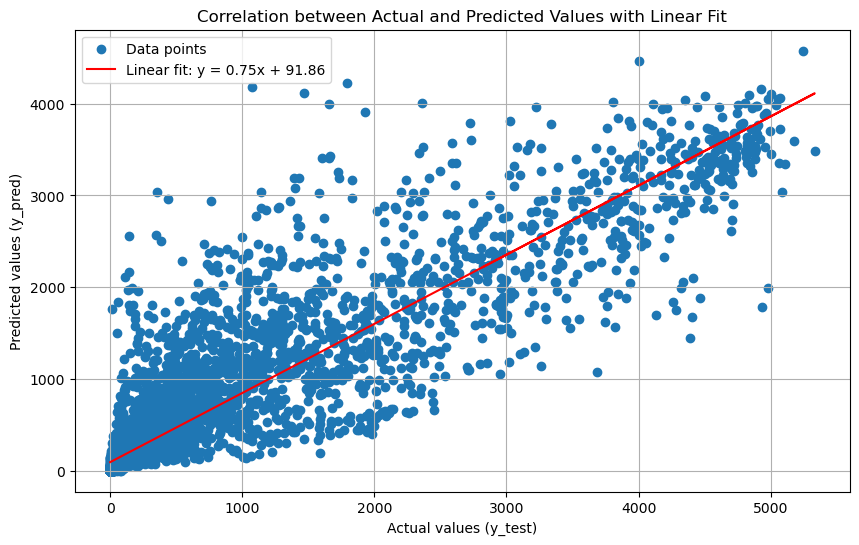

In [25]:
Lin_reg_a.corr_plot()

In [ ]:
Lin_reg_a.pred(X_test_a)
Lin_reg_b.pred(X_test_b)
Lin_reg_c.pred(X_test_c)

y_pred_Lin_reg_test = np.concatenate((Lin_reg_a.prediction, Lin_reg_b.prediction, Lin_reg_c.prediction), axis=0)
y_pred_Lin_reg_valid = np.concatenate((Lin_reg_a.pred_estimated, Lin_reg_b.pred_estimated, Lin_reg_c.pred_estimated), axis=0)
y_valid = Lin_reg_a.y_test